# Descriptors

In [1]:
!pip install rdkit
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 17.0 MB/s eta 0:00:00


In [2]:
from rdkit.Chem import Descriptors
import pandas as pd
from rdkit.Chem import MolFromSmiles, Draw
from rdkit.Chem.Descriptors import CalcMolDescriptors
from rdkit.Chem.Draw import MolsToGridImage
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## RDKit descriptors

In [3]:
all_desc = [desc_name[0] for desc_name in Descriptors._descList]
print(all_desc)

['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'S

In [4]:
data_smiles = pd.read_csv('https://raw.githubusercontent.com/sharonlae77/useful_codes/main/data/data_smiles.csv')

In [5]:
data_smiles

,name,smiles
0,amoxicillin,CC1([C@@H](N2[C@H](S1)[C@@H](C2=O)NC(=O)[C@@H]...
1,cefazolin,CC1=NN=C(S1)SCC2=C(N3[C@@H]([C@@H](C3=O)NC(=O)...
2,meropenem,C[C@@H]1[C@@H]2[C@H](C(=O)N2C(=C1S[C@H]3C[C@H]...
3,aztreonam,C[C@H]1[C@@H](C(=O)N1S(=O)(=O)O)NC(=O)/C(=N\OC...
4,clavulanic acid,C1[C@@H]2N(C1=O)[C@H](/C(=C/CO)/O2)C(=O)O


In [6]:
mol = [MolFromSmiles(i) for i in data_smiles['smiles']]
descriptors = [CalcMolDescriptors(i) for i in mol]
df_descriptors = pd.DataFrame(descriptors)
data_descriptors = pd.concat([data_smiles, df_descriptors],axis=1)

In [7]:
data_descriptors

,name,smiles,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,amoxicillin,CC1([C@@H](N2[C@H](S1)[C@@H](C2=O)NC(=O)[C@@H]...,12.347539,12.347539,0.060621,-1.056554,0.553032,28.040000,365.411,346.259,...,1,0,0,0,0,0,0,0,0,0
1,cefazolin,CC1=NN=C(S1)SCC2=C(N3[C@@H]([C@@H](C3=O)NC(=O)...,12.598077,12.598077,0.015313,-1.160962,0.405190,21.000000,454.519,440.407,...,2,0,0,0,1,0,0,0,0,0
2,meropenem,C[C@@H]1[C@@H]2[C@H](C(=O)N2C(=C1S[C@H]3C[C@H]...,12.340839,12.340839,0.007569,-1.119336,0.558825,34.576923,383.470,358.270,...,1,0,0,0,0,0,0,0,0,0
3,aztreonam,C[C@H]1[C@@H](C(=O)N1S(=O)(=O)O)NC(=O)/C(=N\OC...,12.562142,12.562142,0.034954,-4.756269,0.174788,20.500000,435.440,418.304,...,0,0,0,0,0,1,0,0,0,0
4,clavulanic acid,C1[C@@H]2N(C1=O)[C@H](/C(=C/CO)/O2)C(=O)O,11.069537,11.069537,0.148935,-1.138657,0.551312,32.500000,199.162,190.090,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data_descriptors.to_csv('data_descriptors.csv',index=False)

## Visualizing molecules

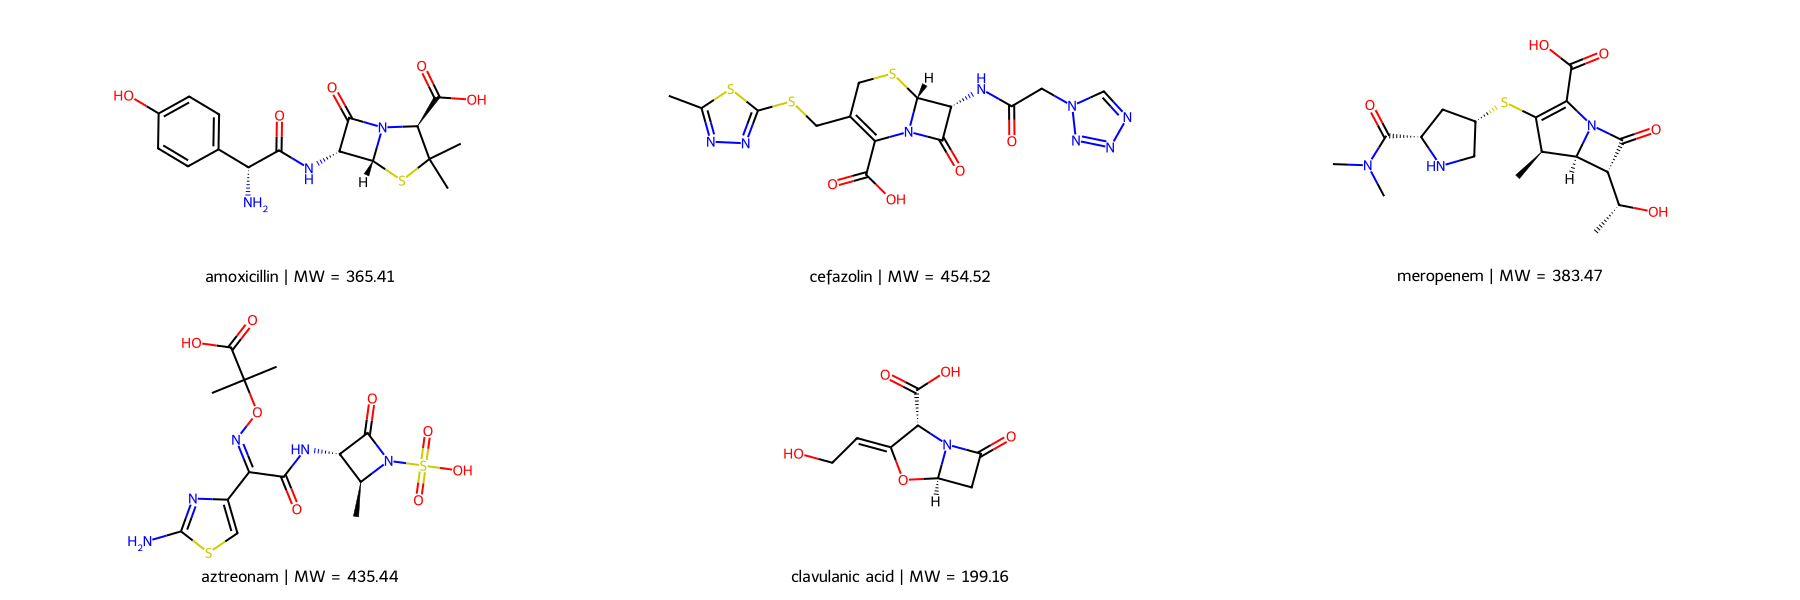

In [9]:
legends = []
for i in range(len(data_descriptors)):
    name = data_descriptors['name'].iloc[i]
    molwt = data_descriptors['MolWt'].iloc[i]
    legend = f'{name} | MW = {round(molwt,2)}'
    legends.append(legend)

opts = Draw.MolDrawOptions()
img = MolsToGridImage(mol,
                      subImgSize=(600, 300),
                      legends=legends,
                      returnPNG=True,
                      drawOptions=opts)
img

## Visualizing descriptors

In [10]:
data_descriptors = pd.read_csv('data_descriptors.csv')
param = ['MolWt',
				'MolLogP',
				'NumHDonors',
				'NumHAcceptors',
				'NumRotatableBonds',
         'TPSA']
phys = pd.concat([data_descriptors['name'],
                  data_descriptors[param]],axis=1)

fig = make_subplots(rows=1,
                    cols=len(param),
                    subplot_titles=param)

for i, col in enumerate(param):
    fig.add_trace(
                  go.Box(
                  y=phys[col],
                  boxpoints='all',
                  marker=dict(size=8),
                  text=phys['name'],
                  hoverinfo='text+y',
                  showlegend=False
                  ),
                  row=1,
                  col=i+1
                  )

    fig.update_xaxes(showticklabels=False,
                     row=1,
                     col=i+1)

fig.update_layout(width=1000,
                  height=400,
                  title_text="Calculated descriptors of beta lactam molecules")

fig.show()
fig.write_html("calc_desc.html")